IMPORTING LIBRARIES

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

CONVERTING IMAGE INTO GRAYSCALE

Text(0.5, 1.0, 'Grayscale image')

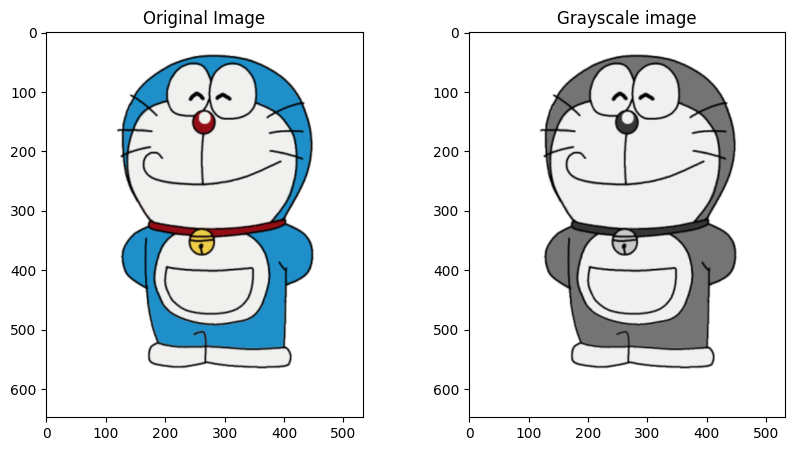

In [43]:
image = cv2.imread("C:/Users/parth/Desktop/neela_bilota.png")
actual_image  =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_ , var = plt.subplots(1,2,figsize=(10,5)) #subplot of 1 row and 2 columns

#displaying images
var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(gray_image,cmap = 'gray')
var[1].set_title('Grayscale image')

BLURRING THE IMAGE

Text(0.5, 1.0, 'Blurred image')

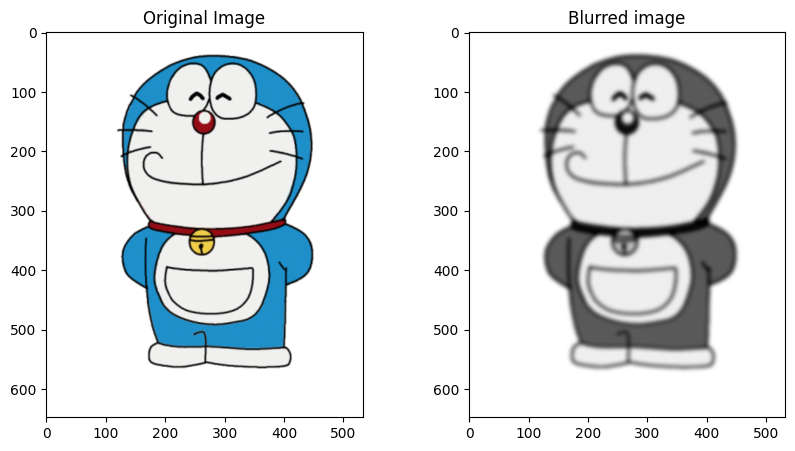

In [111]:
blurred_image = cv2.GaussianBlur(gray_image,(17,17),3.5)

_ , var = plt.subplots(1,2,figsize=(10,5)) 

var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(blurred_image,cmap = 'gray')
var[1].set_title('Blurred image')

SOBEL AND SCHARR EDGE DECTION FUNCTION

In [45]:
def conv(img , mat):
    a,b = img.shape
    padded_image = np.pad(img,1,mode = 'constant')
    output = np.zeros_like(img)

    for i in range(a):
        for j in range(b):
            temporary_area = padded_image[i:i+3 , j:j+3]
            output[i,j] = np.sum(temporary_area*mat)
    return output

LAPLACIAN EDGE DETECTION FUNCTION

In [5]:
def lap():
    pass

CANNY EDGE DETECTION FUNCTION

In [6]:
def canny():
    pass

THRESHOLD FUNCTION

In [46]:
def threshold(img , t):
    rows,cols = img.shape
    output = np.zeros_like(img)
    for i in range (rows):
        for j in range (cols):
            if img[i][j] >= t:
                output[i][j] = 255
            else:
                output[i][j] = 0
    return output

NORMALIZE FUNCTION

In [47]:
def normalize(img):
    img = img - img.min()
    img = img / img.max()
    img = (img * 255).astype(np.uint8)
    return img


SOBEL EDGE DETECTION

Text(0.5, 1.0, 'Sobel')

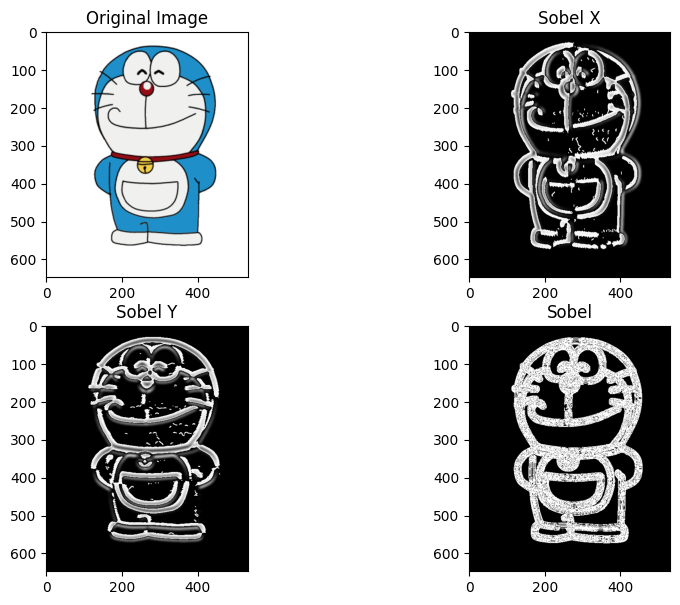

In [112]:
sobel_x_matrix = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y_matrix = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

sobel_x = conv(blurred_image,sobel_x_matrix)
sobel_y = conv(blurred_image,sobel_y_matrix)

sobel_x = np.absolute(sobel_x)
sobel_y = np.absolute(sobel_y)

sobel_x = normalize(sobel_x)
sobel_y  = normalize(sobel_y)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude_norm = sobel_magnitude / sobel_magnitude.max()  
sobel_magnitude_norm = (sobel_magnitude_norm * 255).astype(np.uint8)


sobel_output = threshold(sobel_magnitude_norm ,80)

_, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0][0].imshow(actual_image, )
axs[0][0].set_title('Original Image')

axs[0][1].imshow(sobel_x, cmap='gray')
axs[0][1].set_title('Sobel X')

axs[1][0].imshow(sobel_y, cmap='gray')
axs[1][0].set_title('Sobel Y')

axs[1][1].imshow(sobel_output, cmap='gray')
axs[1][1].set_title('Sobel')




SCHARR EDGE DETECTION

Text(0.5, 1.0, 'Scharr')

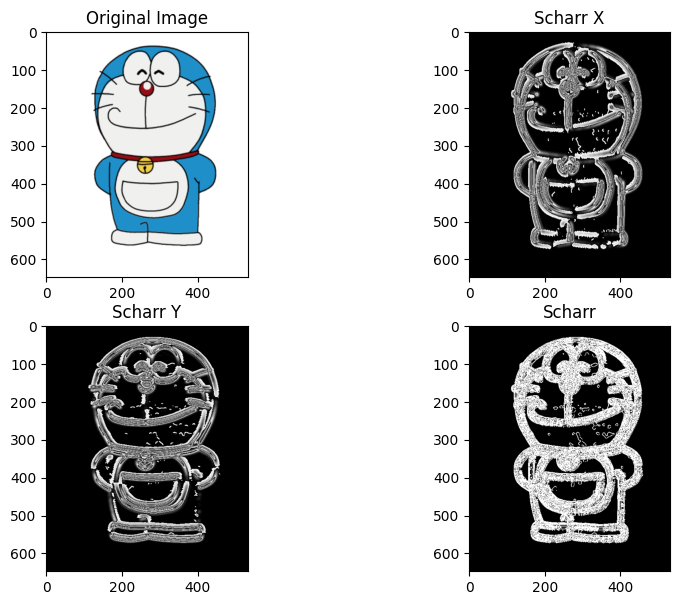

In [115]:
scharr_x_matrix = np.array([[-3, 0, 3],
                     [-10, 0, 10],
                     [-3, 0, 3]])

scharr_y_matrix = np.array([[-3, -10, -3],
                     [0, 0, 0],
                     [3, 10, 3]])


scharr_x = conv(blurred_image,scharr_x_matrix)
scharr_y = conv(blurred_image,scharr_y_matrix)

scharr_x = np.absolute(scharr_x)
scharr_y = np.absolute(scharr_y)

scharr_x = normalize(scharr_x)
scharr_y = normalize(scharr_y)


scharr_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

scharr_magnitude_norm = scharr_magnitude / scharr_magnitude.max()  
scharr_magnitude_norm = (scharr_magnitude_norm * 255).astype(np.uint8)


scharr_output = threshold(scharr_magnitude_norm ,80)



_, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0][0].imshow(actual_image, )
axs[0][0].set_title('Original Image')

axs[0][1].imshow(scharr_x, cmap='gray')
axs[0][1].set_title('Scharr X')

axs[1][0].imshow(scharr_y, cmap='gray')
axs[1][0].set_title('Scharr Y')

axs[1][1].imshow(scharr_output, cmap='gray')
axs[1][1].set_title('Scharr')


LAPLACIAN EDGE DETECTION

Text(0.5, 1.0, 'Laplacian Edge Detection')

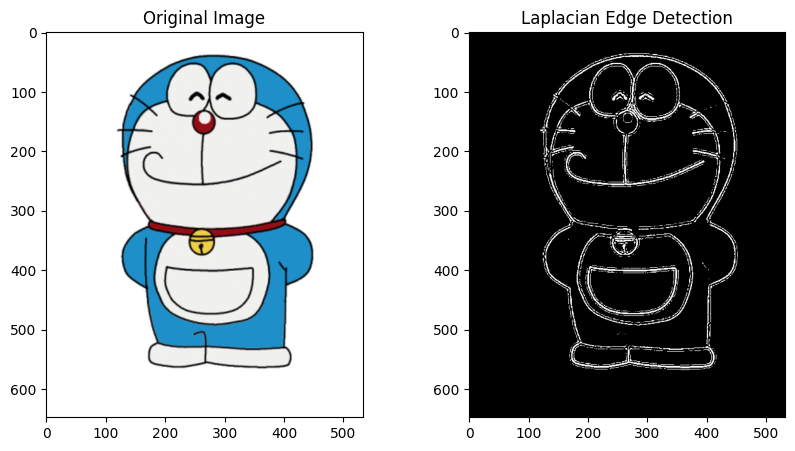

In [119]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

laplacian_image = conv(blurred_image, laplacian_kernel)

laplacian_image = np.absolute(laplacian_image)
laplacian_image = (laplacian_image / laplacian_image.max() * 255).astype(np.uint8)

laplacian_image = threshold(laplacian_image, 50)  



_ , var = plt.subplots(1,2,figsize=(10,5)) 

var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(lap_thresh,cmap = 'gray')
var[1].set_title('Laplacian Edge Detection')

CANNY EDGE DETECTION

Text(0.5, 1.0, 'Canny Edge Detection')

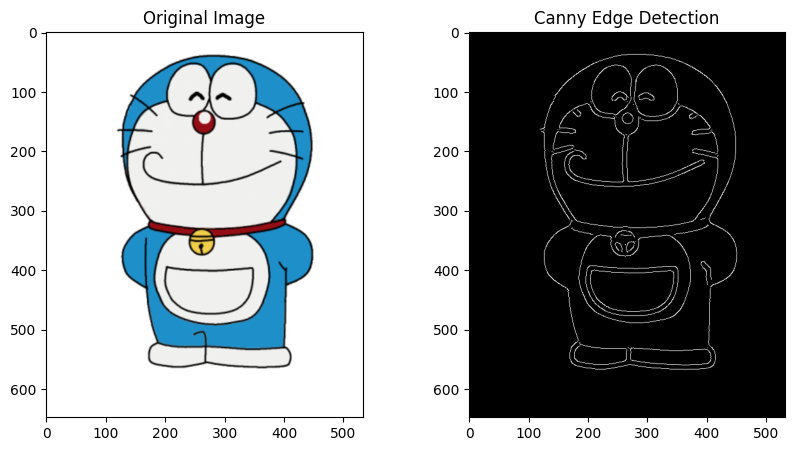

In [118]:
variable = cv2.Canny(blurred_image,threshold1=20,threshold2=80)



_ , var = plt.subplots(1,2,figsize=(10,5))
var[0].imshow(actual_image)
var[0].set_title('Original Image')

var[1].imshow(variable,cmap='gray')
var[1].set_title('Canny Edge Detection')

